In [1]:
import requests
import json
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
'exec(%matplotlib inline)'
import pandas as pd
import numpy as np
import plotly.colors
import plotly.graph_objs as go
import seaborn as sns
import wbgapi as wb

In [2]:
#Indicators to work with: expected years of schooling, lower secondary completion and at least completed upper secondary 
#of females in SSF region.

indicator_strings = "SE.SCH.LIFE.FE", "SE.SEC.CMPT.LO.FE.ZS", "SE.SEC.CUAT.UP.FE.ZS"

In [84]:
wb.series.info('SE.SEC.CMPT.LO.FE.ZS') SE.SCH.LIFE.FE

id,value
SE.SEC.CMPT.LO.FE.ZS,"Lower secondary completion rate, female (% of relevant age group)"
,1 elements


In [63]:
#df= wb.data.DataFrame(["SE.SCH.LIFE.FE"], economy= wb.region.members("SSF"), time=range(2000,2021), labels=True, skipBlanks=True)

# Lower secondary completion rate, female (% of relevant age group)

In [33]:
df= wb.data.DataFrame(["SE.SEC.CMPT.LO.FE.ZS"], economy= wb.region.members("SSF"), time=range(2000,2021), labels=True, skipBlanks=True)
df.head()

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
MRT,Mauritania,NaN,15.49224,14.28704,14.420380,14.205550,16.930710,19.60829,15.862490,NaN,...,NaN,NaN,21.027821,NaN,28.876030,32.253059,29.304449,36.288311,44.143169,44.999458
MWI,Malawi,NaN,NaN,NaN,NaN,NaN,14.528150,18.82457,16.174570,17.075350,...,17.810341,17.988859,18.148951,20.451771,NaN,NaN,NaN,NaN,NaN,NaN
KEN,Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76.623734,78.157082,79.015541,NaN,NaN,NaN
GNB,Guinea-Bissau,9.35689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.560940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPV,Cabo Verde,NaN,NaN,NaN,57.178299,58.239792,59.780861,80.58889,78.748596,79.002411,...,82.838730,90.726158,91.296333,89.827263,87.368011,84.110497,85.920723,87.575821,76.838600,NaN


In [34]:
df= np.round(df, decimals=0)

In [39]:
df[df.YR2019 > 50]

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
GHA,Ghana,48.0,46.0,49.0,47.0,48.0,50.0,NaN,NaN,59.0,...,NaN,60.0,60.0,63.0,63.0,72.0,NaN,72.0,77.0,78.0
GMB,"Gambia, The",31.0,31.0,30.0,40.0,46.0,51.0,54.0,51.0,47.0,...,50.0,56.0,59.0,59.0,59.0,NaN,NaN,NaN,NaN,60.0
SYC,Seychelles,97.0,99.0,97.0,102.0,NaN,113.0,NaN,111.0,112.0,...,109.0,108.0,NaN,103.0,116.0,116.0,114.0,107.0,112.0,110.0
MUS,Mauritius,78.0,80.0,79.0,82.0,82.0,85.0,83.0,82.0,88.0,...,88.0,89.0,86.0,88.0,91.0,90.0,93.0,90.0,93.0,93.0
SLE,Sierra Leone,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34.0,44.0,44.0,NaN,44.0,54.0,51.0,50.0,72.0


In [40]:
df[df.YR2019 < 50]

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
MRT,Mauritania,NaN,15.0,14.0,14.0,14.0,17.0,20.0,16.0,NaN,...,NaN,NaN,21.0,NaN,29.0,32.0,29.0,36.0,44.0,45.0
SEN,Senegal,11.0,11.0,12.0,17.0,16.0,18.0,20.0,28.0,23.0,...,28.0,30.0,33.0,35.0,41.0,40.0,NaN,NaN,NaN,41.0
NER,Niger,4.0,4.0,4.0,3.0,6.0,6.0,7.0,6.0,7.0,...,7.0,8.0,9.0,10.0,10.0,13.0,14.0,15.0,17.0,16.0
TGO,Togo,13.0,16.0,18.0,21.0,23.0,27.0,28.0,23.0,25.0,...,25.0,29.0,NaN,30.0,29.0,32.0,34.0,39.0,41.0,44.0
BFA,Burkina Faso,5.0,6.0,NaN,7.0,NaN,8.0,9.0,10.0,13.0,...,15.0,16.0,18.0,20.0,23.0,26.0,30.0,37.0,45.0,44.0
MOZ,Mozambique,3.0,NaN,5.0,NaN,6.0,8.0,9.0,11.0,15.0,...,19.0,21.0,21.0,22.0,22.0,22.0,NaN,23.0,NaN,24.0
RWA,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.0,NaN,38.0,37.0,37.0,40.0,39.0,46.0
MDG,Madagascar,13.0,13.0,13.0,14.0,15.0,18.0,20.0,22.0,24.0,...,28.0,31.0,33.0,37.0,37.0,37.0,37.0,NaN,38.0,37.0
BDI,Burundi,NaN,NaN,NaN,NaN,7.0,7.0,6.0,NaN,10.0,...,14.0,16.0,17.0,21.0,24.0,32.0,38.0,43.0,36.0,33.0
CIV,Cote d'Ivoire,26.0,16.0,18.0,NaN,NaN,NaN,19.0,19.0,24.0,...,NaN,22.0,25.0,NaN,26.0,28.0,32.0,38.0,43.0,47.0


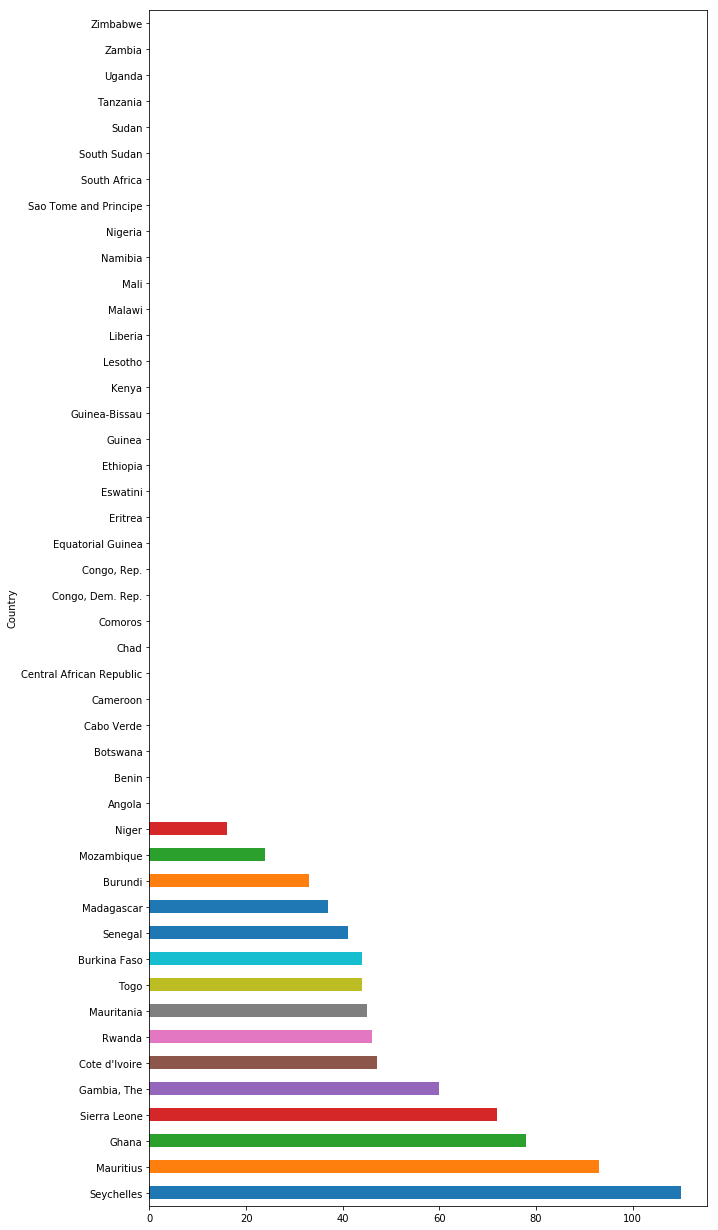

In [52]:
df.groupby('Country').YR2019.mean().sort_values(ascending=False, na_position='last').plot(kind='barh', figsize=(10,22))

In [53]:
#df.groupby('Country').YR2019.hist(bins=20, figsize=(8,6))

In [20]:
#df.sort_index().groupby('Country').last().corr()

# Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)

In [31]:
df1= wb.data.DataFrame(["SE.SEC.CUAT.UP.FE.ZS"], economy= wb.region.members("SSF"), time=range(2000,2021), labels=True, skipBlanks=True)
df1.head()

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018
KEN,Kenya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.923611,18.001209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPV,Cabo Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.808149,NaN,NaN,NaN
NAM,Namibia,NaN,16.296329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHA,Ghana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.678600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEN,Senegal,NaN,NaN,NaN,NaN,NaN,NaN,2.80204,NaN,NaN,NaN,NaN,3.25505,NaN,5.19195,NaN,NaN,NaN,5.00873,NaN


In [32]:
df1= np.round(df1, decimals=0)

# Youth not in employment, education or training (NEET)

In [2]:
wb.series.info('SL.UEM.NEET.FE.ZS')

id,value
SL.UEM.NEET.FE.ZS,"Share of youth not in education, employment or training, female (% of female youth population)"
,1 elements


In [3]:
df2= wb.data.DataFrame(["SL.UEM.NEET.FE.ZS" ], economy= wb.region.members("LCN"), time=range(2000,2021), labels=True, skipBlanks=True)
df2.head()

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
PAN,Panama,NaN,NaN,NaN,30.67,NaN,NaN,NaN,NaN,32.439999,...,30.910000,29.920000,26.25,25.450001,26.990000,27.150000,24.059999,23.910000,23.080000,22.790001
TTO,Trinidad and Tobago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.619999,NaN,NaN,NaN,NaN,NaN,NaN
PRY,Paraguay,NaN,32.25,37.080002,31.91,31.530001,29.10,29.260000,29.350000,28.020000,...,28.320000,23.100000,23.00,20.830000,23.590000,23.469999,27.010000,27.320000,NaN,NaN
BLZ,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.72,41.490002,40.389999,40.580002,39.349998,39.439999,NaN,NaN
PER,Peru,NaN,NaN,18.059999,15.96,23.230000,26.93,23.379999,21.620001,21.270000,...,18.370001,19.290001,18.76,19.440001,20.180000,21.299999,20.350000,20.510000,21.040001,20.180000


In [4]:
df2= np.round(df2, decimals=0)

In [5]:
df2.head()

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
PAN,Panama,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,32.0,...,31.0,30.0,26.0,25.0,27.0,27.0,24.0,24.0,23.0,23.0
TTO,Trinidad and Tobago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN
PRY,Paraguay,NaN,32.0,37.0,32.0,32.0,29.0,29.0,29.0,28.0,...,28.0,23.0,23.0,21.0,24.0,23.0,27.0,27.0,NaN,NaN
BLZ,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,41.0,40.0,41.0,39.0,39.0,NaN,NaN
PER,Peru,NaN,NaN,18.0,16.0,23.0,27.0,23.0,22.0,21.0,...,18.0,19.0,19.0,19.0,20.0,21.0,20.0,21.0,21.0,20.0


In [7]:
df2[df2['Country']== 'Trinidad and Tobago']

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
TTO,Trinidad and Tobago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df2.to_csv('LCNNEET.csv', index=True)

In [80]:
df4= wb.data.DataFrame(["SL.EMP.1524.SP.FE.NE.ZS" ], economy= wb.region.members("LCN"), time=range(2000,2021), labels=True, skipBlanks=True)
df4.head()

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
BOL,Bolivia,NaN,NaN,NaN,NaN,NaN,39.470001,43.77,NaN,41.689999,...,NaN,42.009998,34.639999,37.32,40.060001,31.68,33.910000,35.060001,41.020000,37.669998
NIC,Nicaragua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.930000,NaN,28.260000,NaN,NaN,NaN,NaN,NaN
DOM,Dominican Republic,24.67,23.07,24.99,22.780001,23.07,23.080000,23.17,23.209999,24.559999,...,23.32,23.360001,24.559999,21.23,23.020000,24.01,24.059999,25.889999,25.370001,26.330000
JAM,Jamaica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.020000,15.71,15.910000,17.18,20.730000,21.889999,21.860001,23.480000
HTI,Haiti,NaN,NaN,NaN,11.310000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df4= np.round(df4, decimals=0)

In [83]:
df4.to_csv('employmentratiofemale.csv', index=True)

In [ ]:
df5= wb.data.DataFrame(["SL.EMP.1524.SP.FE.NE.ZS" ], economy= wb.region.members("LCN"), time=range(2000,2021), labels=True, skipBlanks=True)
df5.head()

In [ ]:
#age	ageGroup	area	notInEdu	notInEmp	notInTra	neet	notInEduNotEnr	eduBarrier	workBarrier	trainBarrier

# Possible categories 

category1
Family
Domestic work/ caring responsibilities
Male Colleagues
Lack of accommodation
Lack of qualification/ experience
Lack of appropriate job opportunities
Inadequate promotion opportunities
Lack of tranining opportunities
Transport
Employers' lack of flexibility
Lack of financial means
Distance/ Lack of transport
Domestic responsibility
Husband's/ family's consent
Distance/ Lack of transport
Lack of financial means
Concern for safety
Marriage
Lack of transport
Inadequate financial means
Husband's/ family's consent
Pregnancy or sexual health problems
GBV or threats to safety
Burden of care
Domestic responsibility
Training institute too far
Training is not useful
Did not need training
Do not have time

In [50]:
df2= np.round(df2, decimals=0)